# Python code for a paper "An investigation of the false discovery rate and the misinterpretation of p-values" by David Colquhoun published in Royal Society Open Science

##### Some general settings

In [1]:
%matplotlib inline
from pylab import*
import numpy as np
import pandas as pd
import scipy.stats as stats

## Two mean simulation

##### Some starting values

In [2]:
#set mean and SD for sample 1 and sample 2
mu1, sd1 = 0.0, 1.0
mu2, sd2 = 1.0, 1.0
n = 16    #number of obs per sample

#### Plot distribution of observations for sample 1 and sample 2

In [3]:
xmin = mu1 - 4 * sd1
xmax = mu1 + 4 * sd1
increase = (xmax - xmin) / 100
x = np.arange(xmin, xmax, increase)

In [4]:
dist1 = stats.norm(mu1, sd1)
y1 = dist1.pdf(x)
dist2 = stats.norm(mu2, sd2)
y2 = dist2.pdf(x)

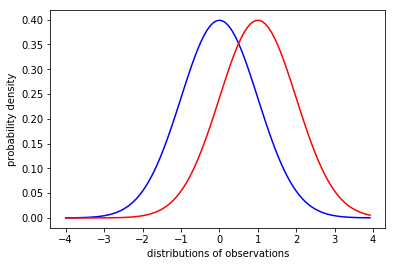

In [5]:
plot(x, y1, 'b-')
plot(x, y2, 'r-')
xlabel('distributions of observations')
ylabel('probability density');

#### Plot distribution of means for sample 1 and sample 2

In [6]:
sdm1 = sd1 / sqrt(n)
sdm2 = sd2 / sqrt(n)
dist1m = stats.norm(mu1, sdm1)
y1m = dist1m.pdf(x)
dist2m = stats.norm(mu2, sdm2)
y2m = dist2m.pdf(x)

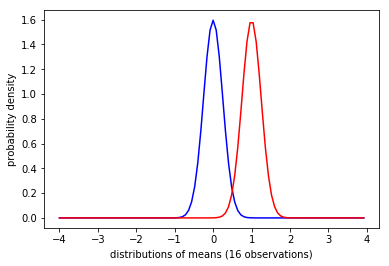

In [7]:
plot(x, y1m, 'b-')
plot(x, y2m, 'r-')
xlabel('distributions of means (16 observations)')
ylabel('probability density');

#### Run simulations

In [8]:
# number of simulation jobs to run
nsim = 100000

In [9]:
cor = 0.0   #correlation = 0
#set covariance matrix
var1 = sd1**2
var2 = sd2**2
sigma = np.array([[var1, cor], [cor, var2]]) #matrix(c(myvar1,mycor,mycor,myvar2),2,2)

In [10]:
#initialisations
mean = np.array([mu1, mu2])
truediff = mean[1] - mean[0]
pval = np.zeros(nsim)
loCI = np.zeros(nsim)
hiCI = np.zeros(nsim)
diff = np.zeros(nsim)
nsig = 0  #counts number of pval between ??? and Pmax =0.0

In [11]:
for r in range(nsim):
    s1, s2 = np.random.multivariate_normal(mean, sigma, n).T
    sd = s2 - s1
    t, p = stats.ttest_ind(s1, s2, equal_var=False, nan_policy='omit')
    low, high = stats.t.interval(0.95, len(sd)-1, loc=np.mean(sd), scale=stats.sem(sd))
    diff[r] = np.mean(s1) - np.mean(s2)
    pval[r] = p
    loCI[r] = low
    hiCI[r] = high

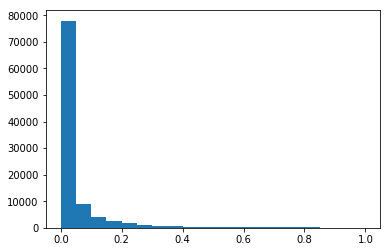

In [12]:
plt.hist(pval, bins=20);

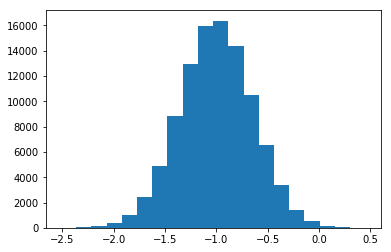

In [13]:
plt.hist(diff, bins=20);

In [14]:
#set min and max P values for "significance"
Pmin, Pmax = 0.0, 0.05
# nsig: counts number of pval between and myPmax =0.0
nsig = pval[(pval > Pmin) & (pval <= Pmax)].size
#mean observed difference for expts with Pmin<P<=Pmax
meandiff = np.sum(diff[(pval > Pmin) & (pval <= Pmax)]) / nsig

In [15]:
Psig = 0.05
nrej = pval[pval <= Psig].size
power = nrej / float(nsim)
print('Power =', power, 'for P =', Psig)

Power = 0.77942 for P = 0.05


In [16]:
#values to limit highly sig,...non-sig
n001 = pval[pval <= 0.001].size  #counts number of P<0.001
n01 = pval[(pval > 0.001) & (pval <= 0.01)].size  #counts number of 0.001<P<0.01
n05 = pval[(pval > 0.01) & (pval <= 0.05)].size  #counts number of 0.01<P<0.05
ns = pval[pval > 0.05].size  #counts number of P>0.05 "non sig"

In [17]:
print("Number of (P <= 0.001) = ", n001, "(=", 100*n001/nsim, "%)")
print("Number of (0.001 < P <= 0.01) = ", n01, "(=", 100*n01/nsim,"%)")
print("Number of (0.01 < P <= 0.05) = ", n05, "(=", 100*n05/nsim,"%)")
print("Number of (P > 0.05) = ", ns, "(=",100*ns/nsim,"%)")
print("Number of (P <= 0.05) = ", nsim-ns, "(", 100*(nsim-ns)/nsim,"%)")
print("\n","Obs diff between means for 'sig' results = ", meandiff, " True value = ", truediff)

Number of (P <= 0.001) =  23219 (= 23.219 %)
Number of (0.001 < P <= 0.01) =  30238 (= 30.238 %)
Number of (0.01 < P <= 0.05) =  24485 (= 24.485 %)
Number of (P > 0.05) =  22058 (= 22.058 %)
Number of (P <= 0.05) =  77942 ( 77.942 %)

 Obs diff between means for 'sig' results =  -1.1306076588424863  True value =  1.0
